In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas fiona shapely pyproj rtree

In [ ]:
!pip install geopandas  # The order in which we install dependencies is very important (it is recommended in the docs)

In [ ]:
import geopandas as gpd

In [ ]:
gpd.__version__

# Import data

In [ ]:
spanish_provinces = gpd.read_file("/content/drive/MyDrive/Asignaturas/APPR/provinces/se89_10_admin_prov_a_x.shp")

In [ ]:
spanish_provinces

In [ ]:
type(spanish_provinces)

geopandas.geodataframe.GeoDataFrame

# Basic plot data

<Axes: >

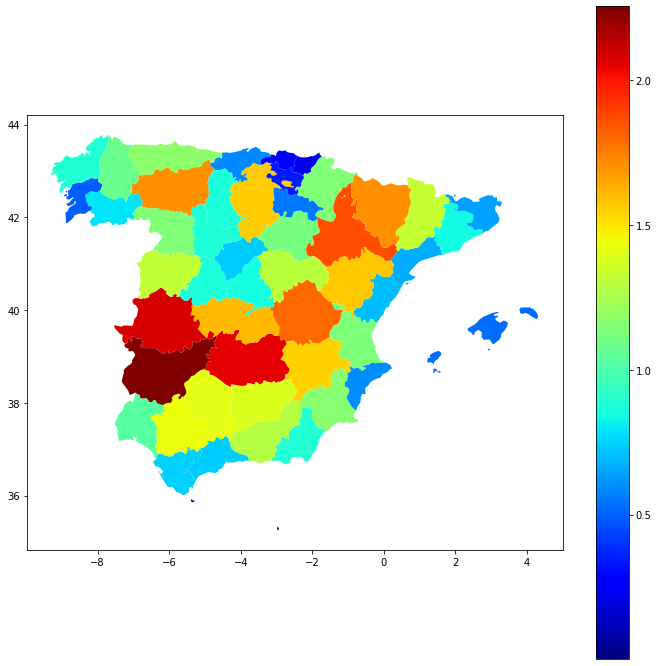

In [ ]:
spanish_provinces.plot(cmap = 'jet', column = 'st_area_sh', legend = True, figsize=(12,12)) #color = 'red' edgecolor = 'black' cmap = 'jet' column = 'rotulo' legend = True

In [ ]:
spanish_provinces.plot?
# The plots come from matplotlib library!
# colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
# Student work: Find province with biggest and smallest area (column name = st_area_sh)
spanish_provinces.loc[spanish_provinces['st_area_sh'] == spanish_provinces['st_area_sh'].max()]

# Extra plots

In [ ]:
region_of_interest = gpd.read_file("/content/drive/MyDrive/Asignaturas/APPR/region of interest/area_of_interest.geojson")

<Axes: >

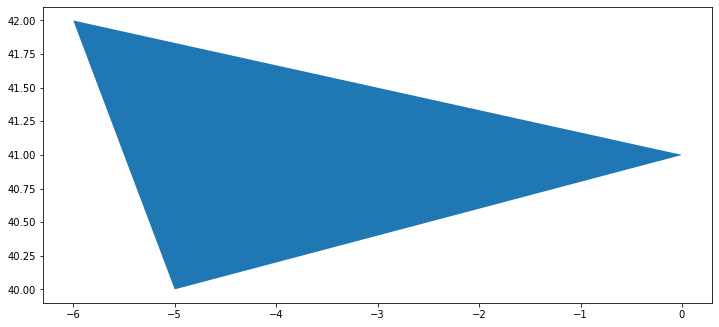

In [ ]:
region_of_interest.plot(figsize=(12,12))

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

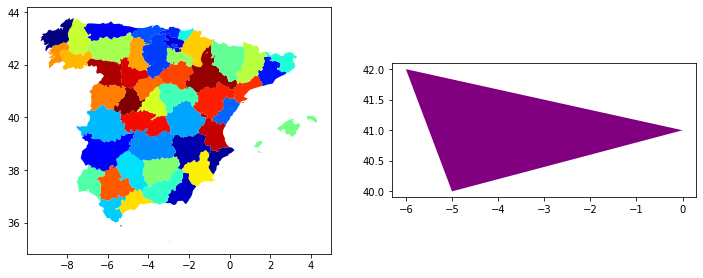

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 12))
spanish_provinces.plot(ax = ax1, cmap = 'jet', column = 'rotulo')
region_of_interest.plot(ax = ax2, color = "purple")

<Axes: >

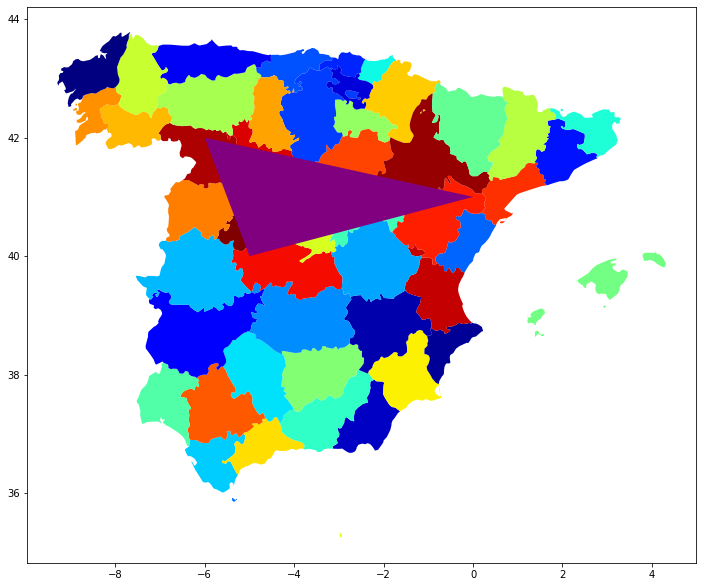

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12))
spanish_provinces.plot(ax = ax, cmap = 'jet', column = 'rotulo')
region_of_interest.plot(ax = ax, color = "purple") # color none, edgecolor = 'black'

In [ ]:
capital_cities = gpd.read_file("/content/drive/MyDrive/Asignaturas/APPR/cities/capitals.geojson")

<Axes: >

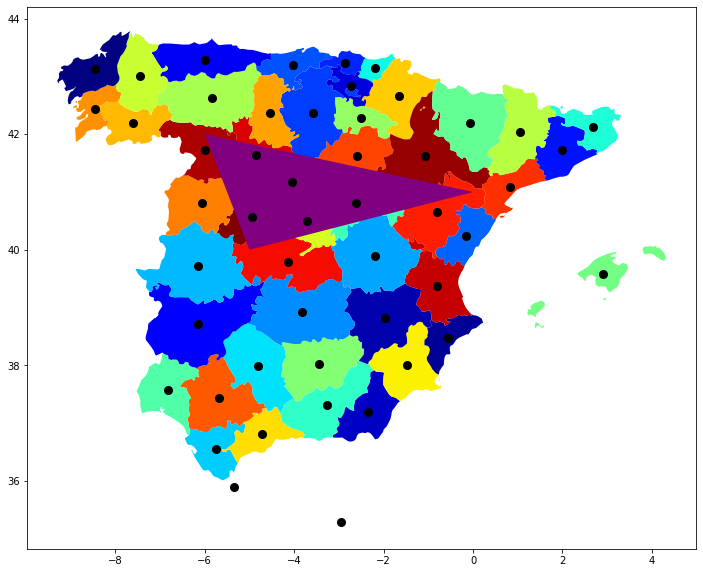

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12))
spanish_provinces.plot(ax = ax, cmap = 'jet', column = 'rotulo')
region_of_interest.plot(ax = ax, color = "purple") # color none, edgecolor = 'black'
capital_cities.plot(ax = ax, color = "black", markersize=64) # color none, edgecolor = 'black'

<Axes: >

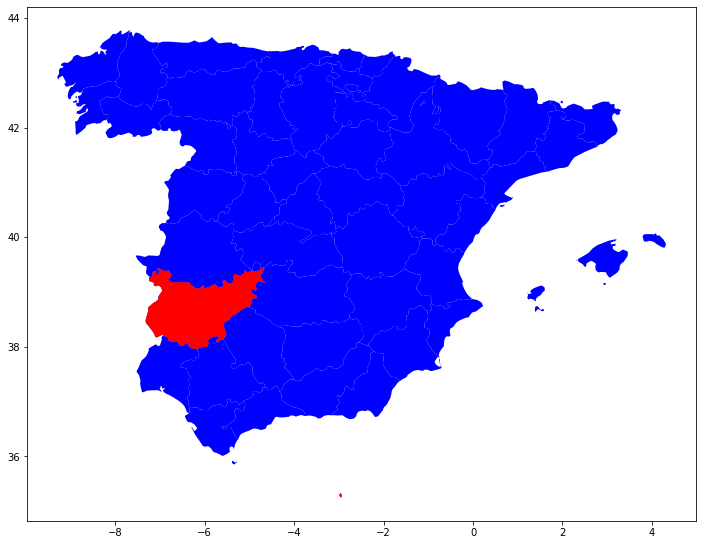

In [ ]:
# Student work: Draw in a different color the province with biggest and smallest size. Overlap the province with the map of Spain.
fig, ax = plt.subplots(figsize = (12, 12))
spanish_provinces.plot(ax=ax, color='blue')
spanish_provinces.loc[spanish_provinces['st_area_sh'] == spanish_provinces['st_area_sh'].max()].plot(ax=ax, color="red")
spanish_provinces.loc[spanish_provinces['st_area_sh'] == spanish_provinces['st_area_sh'].min()].plot(ax=ax, color="red")

# Coordinate reference system

In [ ]:
spanish_provinces.crs

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
region_of_interest.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

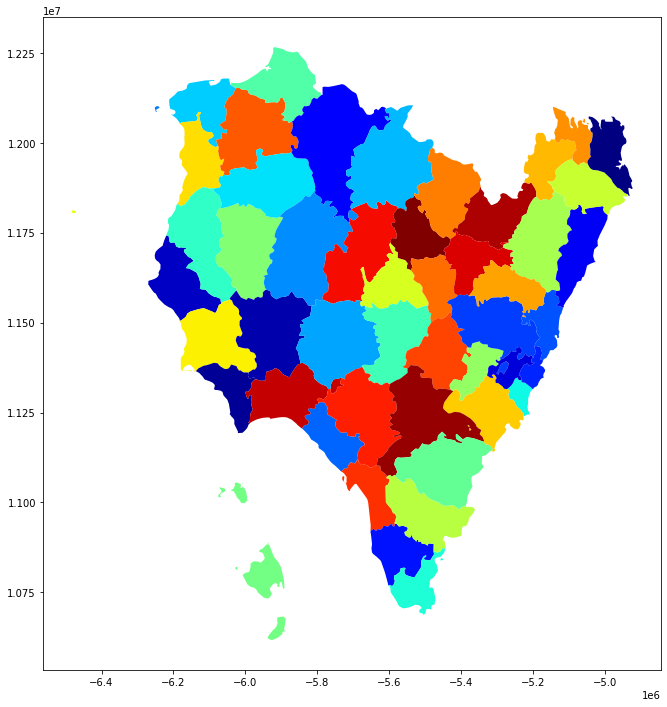

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12))
spanish_provinces.to_crs(epsg=24547).plot(ax = ax, cmap = 'jet', column = 'rotulo') # 2062 spain, 24547 malaysia, 27563 France

In [ ]:
# Student work: why do you think malaysian crs makes Spain look like that?

# Intersections

In [ ]:
provinces_in_roc = gpd.overlay(spanish_provinces, region_of_interest, how = 'intersection') # this should rise a CRS error!!

In [ ]:
provinces_in_roc = gpd.overlay(spanish_provinces, region_of_interest.to_crs(epsg=4258), how = 'intersection')

<Axes: >

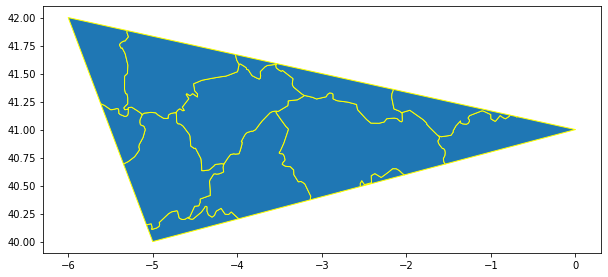

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
provinces_in_roc.plot(ax = ax, edgecolor='yellow')

# Geometrical computations

In [ ]:
provinces_in_roc.area # wrong crs!

<ipython-input-34-22e89e268b2b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  provinces_in_roc.area # wrong crs!


0     0.137383
1     0.665981
2     0.024592
3     0.680632
4     1.164241
5     0.148385
6     0.361117
7     0.740310
8     0.308753
9     0.354090
10    0.650204
11    0.222433
12    0.041878
dtype: float64

In [ ]:
provinces_in_roc.to_crs(epsg=2062).area

0     1.288358e+09
1     6.242640e+09
2     2.296214e+08
3     6.378140e+09
4     1.087647e+10
5     1.381989e+09
6     3.344586e+09
7     6.886171e+09
8     2.884355e+09
9     3.269829e+09
10    6.033332e+09
11    2.087821e+09
12    3.881192e+08
dtype: float64

In [ ]:
provinces_in_roc['area'] = provinces_in_roc.to_crs(epsg=2062).area / 1e6

In [ ]:
provinces_in_roc

# Export the dataframe

In [ ]:
provinces_in_roc.to_file('province_in_roi.geojson')

# Student work

In [ ]:
# Find province of Barcelona and plot it
barcelona = spanish_provinces.loc[spanish_provinces['rotulo'] == 'Barcelona']

In [ ]:
from shapely.geometry import Polygon

In [ ]:
# Create a polygon with this shape [[2, 41.5], [2.5, 41.6], [2.5, 41.2], [2, 41.2],[2, 41.5]]
roi = Polygon([[2, 41.5], [2.5, 41.6], [2.5, 41.2], [2, 41.2],[2, 41.5]])

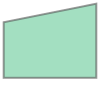

In [ ]:
roi

In [ ]:
# Create a GeoDataFrame with this polygon (we do this so we can plot it as we've learnt)
roi_df = gpd.GeoDataFrame(geometry=[roi], crs=2062)

<Axes: >

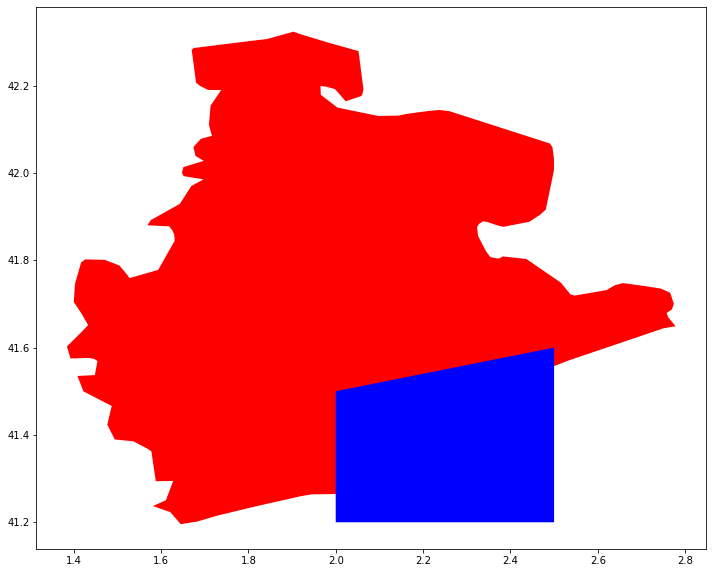

In [ ]:
# Plot both geoDataFrames in the same figure. Let's see...
fig, ax = plt.subplots(figsize = (12, 12))
barcelona.plot(ax=ax, color='red')
roi_df.plot(ax=ax, color='blue')

In [ ]:
from shapely.geometry import LineString

In [ ]:
# Create a line with this shape [[2, 42], [1.8, 41.6], [2.2, 41.4]]
river = LineString([[2, 42], [1.8, 41.6], [2.2, 41.4]])

In [ ]:
# Create a GeoDataFrame with this polygon (we do this so we can plot it as we've learnt)
river_df = gpd.GeoDataFrame(geometry=[river], crs=2062)

<Axes: >

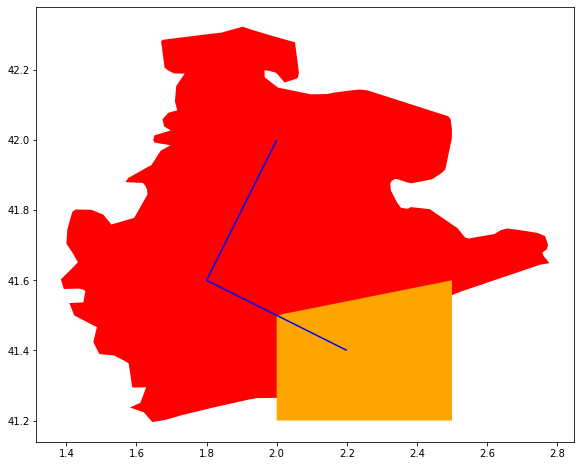

In [ ]:
# Plot Barcelona, ROI and river geoDataFrames in the same figure. Let's see...
fig, ax = plt.subplots(figsize = (10, 8))
barcelona.plot(ax = ax, color='red')
river_df.plot(ax = ax, color='blue')
roi_df.plot(ax = ax, color='orange')